In [379]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [380]:
Dataset = pd.read_csv(r"C:\Users\Ananta Arora\Documents\data\DataScience\Dataset_1.csv")

In [381]:
Dataset.head()

,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Swimming Pool,Exercise Room,Basketball Court,Yoga Classes,Club,Free Wifi,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,9,January,Thursday
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,3,January,Friday
2,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,2,February,Saturday
3,UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,Europe,6,February,Friday
4,Canada,5,5,2,4,Mar-May,Solo,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,7,March,Tuesday


In [382]:
Dataset.tail()

,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Swimming Pool,Exercise Room,Basketball Court,Yoga Classes,Club,Free Wifi,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday
499,UK,15,4,8,5,Sep-Nov,Couples,YES,YES,NO,YES,YES,YES,The Westin las Vegas Hotel Casino & Spa,4,826,Europe,1,October,Sunday
500,Canada,50,13,29,4,Sep-Nov,Couples,YES,YES,NO,YES,YES,YES,The Westin las Vegas Hotel Casino & Spa,4,826,North America,8,November,Thursday
501,USA,154,23,31,4,Sep-Nov,Friends,YES,YES,NO,YES,YES,YES,The Westin las Vegas Hotel Casino & Spa,4,826,North America,4,November,Thursday
502,USA,9,6,5,2,Dec-Feb,Families,YES,YES,NO,YES,YES,YES,The Westin las Vegas Hotel Casino & Spa,4,826,North America,9,December,Wednesday
503,USA,20,19,112,4,Dec-Feb,Families,YES,YES,NO,YES,YES,YES,The Westin las Vegas Hotel Casino & Spa,4,826,North America,5,December,Tuesday


In [383]:
Dataset = Dataset.drop(['Hotel name', 'User country','Period of stay','Review month','Review weekday','User continent'], axis=1)

In [384]:
X

array([[  11,    4,   13,    5,    1,    0,    1,    0,    0,    1,    1,
           3, 3773],
       [ 119,   21,   75,    3,    2,    0,    1,    0,    0,    1,    1,
           3, 3773],
       [  36,    9,   25,    5,    0,    0,    1,    0,    0,    1,    1,
           3, 3773],
       [  14,    7,   14,    4,    1,    0,    1,    0,    0,    1,    1,
           3, 3773],
       [   5,    5,    2,    4,    3,    0,    1,    0,    0,    1,    1,
           3, 3773],
       [  31,    8,   27,    3,    4,    0,    1,    0,    0,    1,    1,
           3, 3773],
       [  45,   12,   46,    4,    4,    0,    1,    0,    0,    1,    1,
           3, 3773],
       [   2,    1,    4,    4,    0,    0,    1,    0,    0,    1,    1,
           3, 3773],
       [  24,    3,    8,    4,    1,    0,    1,    0,    0,    1,    1,
           3, 3773],
       [  12,    7,   11,    3,    0,    0,    1,    0,    0,    1,    1,
           3, 3773],
       [ 102,   24,   58,    2,    0,    0,    1, 

### Which features are categorical?
>These values classify the samples into sets of similar samples. Within categorical features are the values nominal, ordinal, ratio, or interval based? Among other things this helps us select the appropriate plots for visualization.

**Nominal**: Traveller Type, User Continent, Review Week ,Period Of Stay, TravellerType,Swimming Pool,BasketBall court, Yoga Class, Exercise room,Club, Free Wifi.

**Ordinal**: Review Month, Period Of Stay, Hotel Names

#### Which features are numerical?
> These values change from sample to sample. Within numerical features are the values discrete, continuous, or timeseries based? Among other things this helps us select the appropriate plots for visualization.
Continuous Data can take any value (within a range).Discrete Data can only take certain values

**Continous**: Nr Review, Nr Hotel , Helpful Votes.

**Discrete**: Score, Hotel Star.

In [385]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 14 columns):
Nr. reviews          504 non-null int64
Nr. hotel reviews    504 non-null int64
Helpful votes        504 non-null int64
Score                504 non-null int64
Traveler type        504 non-null object
Swimming Pool        504 non-null object
Exercise Room        504 non-null object
Basketball Court     504 non-null object
Yoga Classes         504 non-null object
Club                 504 non-null object
Free Wifi            504 non-null object
Hotel stars          504 non-null int64
Nr. rooms            504 non-null int64
Member years         504 non-null int64
dtypes: int64(7), object(7)
memory usage: 55.2+ KB


In [386]:
Dataset.describe()

,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Hotel stars,Nr. rooms,Member years
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000
mean,48.130952,16.023810,31.751984,4.123016,4.190476,2196.380952,0.767857
std,74.996426,23.957953,48.520783,1.007302,0.852682,1285.476807,80.692897
min,1.000000,0.000000,0.000000,1.000000,3.000000,188.000000,-1806.000000
25%,12.000000,5.000000,8.000000,4.000000,3.000000,826.000000,2.000000
50%,23.500000,9.000000,16.000000,4.000000,4.000000,2700.000000,4.000000
75%,54.250000,18.000000,35.000000,5.000000,5.000000,3025.000000,6.000000
max,775.000000,263.000000,365.000000,5.000000,5.000000,4027.000000,13.000000


In [387]:
Dataset.describe(include=['O'])

,Traveler type,Swimming Pool,Exercise Room,Basketball Court,Yoga Classes,Club,Free Wifi
count,504,504,504,504,504,504,504
unique,5,2,2,2,2,2,2
top,Couples,YES,YES,NO,YES,YES,YES
freq,214,480,480,384,384,456,480


## Tranforming Features

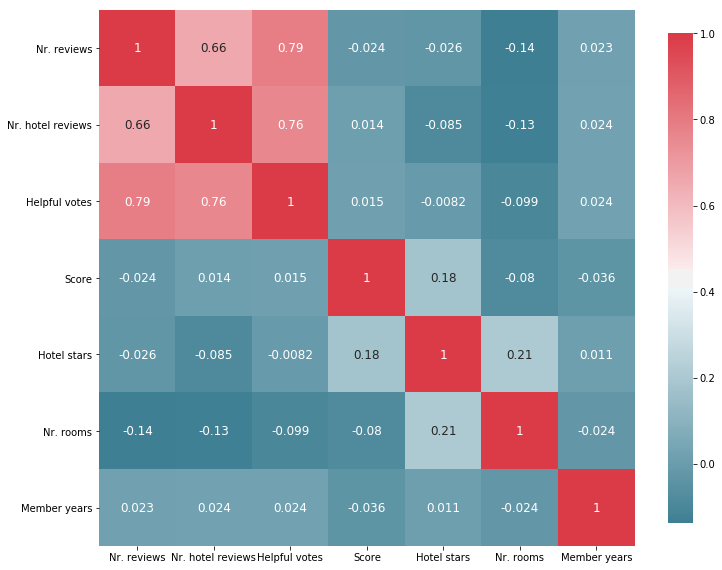

In [388]:
def plot_correlation_map( df ):
    corr = Dataset.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )
plot_correlation_map(  Dataset)

In [389]:
def yesNo(x):
    if x=="YES":
        return 1
    else:
        return 0
    
def toOrd(str):
    x=0
    for l in str:
        x += ord(l)
    return int(x)





In [390]:
Dataset['Traveler type'] = Dataset['Traveler type'].map( {'Friends': 1, 'Families': 0, 'Business':2, 'Solo':3, 'Couples': 4} ).fillna(0).astype(int)

In [391]:
Dataset['Yoga Classes']=Dataset['Yoga Classes'].apply(lambda x : yesNo(x))
Dataset['Swimming Pool']=Dataset['Swimming Pool'].apply(lambda x : yesNo(x))
Dataset['Basketball Court']=Dataset['Basketball Court'].apply(lambda x : yesNo(x))
Dataset['Club']=Dataset['Club'].apply(lambda x : yesNo(x))
Dataset['Free Wifi']=Dataset['Free Wifi'].apply(lambda x : yesNo(x))
Dataset['Exercise Room']=Dataset['Exercise Room'].apply(lambda x : yesNo(x))


Dataset.loc[ Dataset['Helpful votes'] <= 50, 'Helpful votes'] = 1
Dataset.loc[(Dataset['Helpful votes'] > 50) & (Dataset['Helpful votes'] <= 100), 'Helpful votes'] = 2
Dataset.loc[(Dataset['Helpful votes'] > 100) & (Dataset['Helpful votes'] <= 150), 'Helpful votes']   = 3
Dataset.loc[ (Dataset['Helpful votes'] > 150)& (Dataset['Helpful votes'] <= 200), 'Helpful votes']   =  4
Dataset.loc[ (Dataset['Helpful votes'] > 200)& (Dataset['Helpful votes'] <= 250), 'Helpful votes']   =  5
Dataset.loc[ (Dataset['Helpful votes'] > 250)& (Dataset['Helpful votes'] <= 300), 'Helpful votes']   =  6
Dataset.loc[(Dataset['Helpful votes'] > 300 )& (Dataset['Helpful votes'] <= 350), 'Helpful votes']   =  7
    
Dataset['Helpful votes'] = Dataset['Helpful votes'].astype(int)












In [392]:
Dataset.head(5)

,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Traveler type,Swimming Pool,Exercise Room,Basketball Court,Yoga Classes,Club,Free Wifi,Hotel stars,Nr. rooms,Member years
0,11,4,1,5,1,0,1,0,0,1,1,3,3773,9
1,119,21,2,3,2,0,1,0,0,1,1,3,3773,3
2,36,9,1,5,0,0,1,0,0,1,1,3,3773,2
3,14,7,1,4,1,0,1,0,0,1,1,3,3773,6
4,5,5,1,4,3,0,1,0,0,1,1,3,3773,7


D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


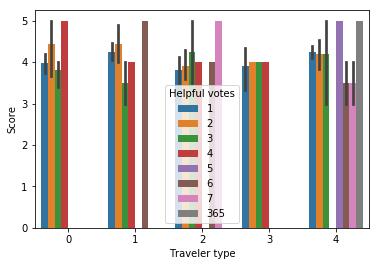

In [416]:
sns.barplot(x="Traveler type", y="Score", hue="Helpful votes", data=Dataset);

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


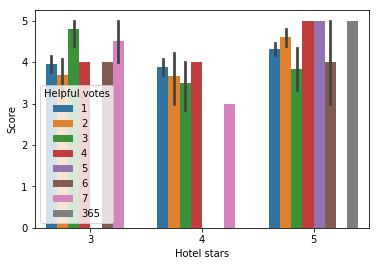

In [415]:
sns.barplot(x="Hotel stars", y="Score", hue="Helpful votes", data=Dataset);

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


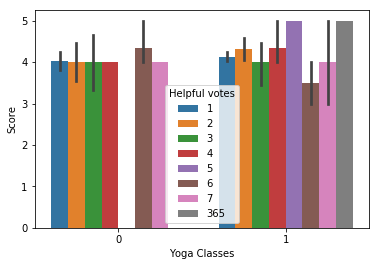

In [419]:
sns.barplot(x="Yoga Classes", y="Score", hue="Helpful votes", data=Dataset);

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


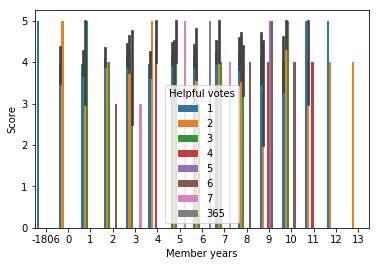

In [421]:
sns.barplot(x="Member years", y="Score", hue="Helpful votes", data=Dataset);

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


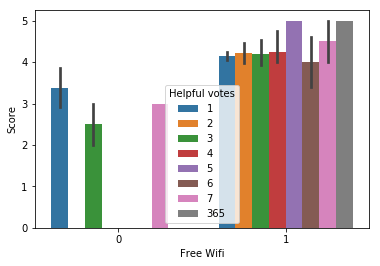

In [424]:
sns.barplot(x="Free Wifi", y="Score", hue="Helpful votes", data=Dataset);

## Importing the Dataset

In [426]:

X = Dataset.iloc[:,:-1].values
Y = Dataset.iloc[:,4].values

In [396]:
X

array([[  11,    4,    1,    5,    1,    0,    1,    0,    0,    1,    1,
           3, 3773],
       [ 119,   21,    2,    3,    2,    0,    1,    0,    0,    1,    1,
           3, 3773],
       [  36,    9,    1,    5,    0,    0,    1,    0,    0,    1,    1,
           3, 3773],
       [  14,    7,    1,    4,    1,    0,    1,    0,    0,    1,    1,
           3, 3773],
       [   5,    5,    1,    4,    3,    0,    1,    0,    0,    1,    1,
           3, 3773],
       [  31,    8,    1,    3,    4,    0,    1,    0,    0,    1,    1,
           3, 3773],
       [  45,   12,    1,    4,    4,    0,    1,    0,    0,    1,    1,
           3, 3773],
       [   2,    1,    1,    4,    0,    0,    1,    0,    0,    1,    1,
           3, 3773],
       [  24,    3,    1,    4,    1,    0,    1,    0,    0,    1,    1,
           3, 3773],
       [  12,    7,    1,    3,    0,    0,    1,    0,    0,    1,    1,
           3, 3773],
       [ 102,   24,    2,    2,    0,    0,    1, 

In [397]:
Y

array([1, 2, 0, 1, 3, 4, 4, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 4, 4, 4, 4,
       0, 4, 4, 2, 4, 2, 3, 4, 4, 4, 3, 1, 4, 4, 1, 1, 4, 0, 2, 4, 0, 1,
       0, 1, 4, 3, 4, 3, 4, 4, 4, 2, 4, 2, 4, 4, 4, 1, 0, 4, 3, 0, 1, 4,
       0, 4, 4, 2, 2, 4, 2, 4, 1, 3, 4, 1, 1, 0, 0, 1, 0, 4, 4, 3, 4, 4,
       4, 2, 0, 4, 4, 0, 1, 4, 0, 1, 4, 2, 2, 4, 4, 2, 4, 1, 2, 1, 3, 4,
       1, 4, 4, 4, 1, 1, 3, 1, 4, 0, 1, 4, 0, 0, 0, 0, 4, 4, 4, 4, 4, 3,
       4, 0, 0, 1, 4, 4, 2, 1, 4, 0, 0, 4, 1, 1, 1, 4, 4, 4, 1, 2, 0, 2,
       4, 1, 2, 1, 0, 4, 4, 4, 4, 1, 2, 2, 4, 0, 4, 0, 4, 4, 0, 0, 4, 4,
       4, 2, 1, 4, 1, 0, 1, 2, 1, 0, 0, 4, 1, 0, 4, 0, 4, 0, 4, 4, 1, 2,
       2, 4, 3, 4, 4, 4, 4, 4, 4, 3, 2, 1, 4, 4, 2, 4, 4, 4, 3, 2, 2, 0,
       4, 4, 4, 4, 0, 0, 4, 2, 0, 0, 4, 4, 0, 0, 1, 4, 4, 0, 2, 4, 2, 2,
       0, 4, 3, 1, 4, 0, 1, 4, 1, 4, 4, 1, 4, 0, 4, 2, 0, 1, 4, 2, 4, 4,
       2, 4, 4, 2, 4, 1, 0, 1, 2, 1, 4, 2, 1, 0, 0, 0, 4, 1, 4, 2, 4, 4,
       1, 2, 4, 0, 2, 4, 4, 4, 2, 0, 0, 4, 1, 3, 0,

# Splitting the dataset into the Training set and Test set

In [398]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [399]:
print(Dataset.columns.values)

['Nr. reviews' 'Nr. hotel reviews' 'Helpful votes' 'Score' 'Traveler type'
 'Swimming Pool' 'Exercise Room' 'Basketball Court' 'Yoga Classes' 'Club'
 'Free Wifi' 'Hotel stars' 'Nr. rooms' 'Member years']


In [400]:
print (X_train.shape, Y_train.shape)
print (X_test.shape, Y_test.shape)

(403, 13) (403,)
(101, 13) (101,)


In [411]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

86.35

In [401]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

59.8

In [402]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

96.03

In [407]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier. 
clf = RandomForestClassifier()

# Choose some parameter combinations to try
parameters = {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, Y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [410]:
predictions = clf.predict(X_test)
print(accuracy_score(Y_test, predictions))

from sklearn.cross_validation import KFold

def run_kfold(clf):
    kf = KFold(891, n_folds=10)
    outcomes = []
    fold = 0
    for train_index, test_index in kf:
        fold += 1
        X_train, X_test = X.values[train_index], X.values[test_index]
        Y_train, Y_test = Y.values[train_index], Y.values[test_index]
        clf.fit(X_train, Y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(Y_test, predictions)
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))     
    mean_outcome = np.mean(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome)) 

    run_kfold(clf)

0.9504950495049505
